👀 Vista previa del dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             

C:\Users\CELTI\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


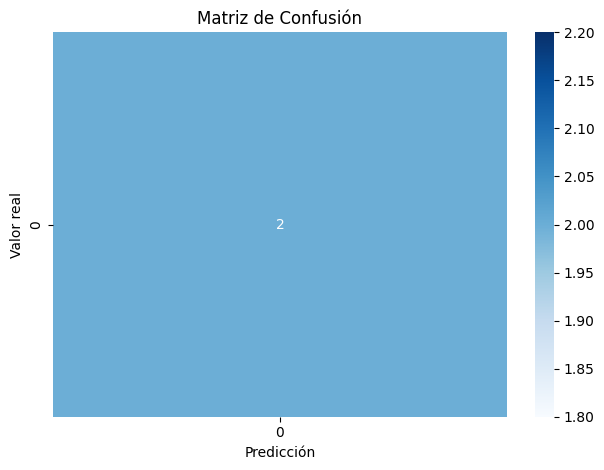

In [ ]:
# Predicción de ingresos con LogisticRegression + mejoras

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# 1. Cargar datos
df = pd.read_csv("adult.csv")

print("👀 Vista previa del dataset:")
print(df.head())

# 2. Limpiar datos
df = df.replace(' ?', np.nan)
df = df.dropna()

# 3. Codificar variables categóricas
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# 4. Separar X e y
X = df.drop("income", axis=1)
y = df["income"]

# 5. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modelo: Regresión Logística
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# 7. Métricas del modelo base
print("\n📊 Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report (LogReg):")
print(classification_report(y_test, y_pred))

# 8. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("📊 Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

# 9. 🔁 Validación cruzada
scores = cross_val_score(modelo, X, y, cv=5)
print("🔁 Cross-validation scores (LogReg):", scores)
print("📈 Media de CV:", round(scores.mean(), 4))

# 10. 🌲 Modelo alternativo: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🌲 Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n🧾 Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# 11. 🌟 Importancia de variables (RandomForest)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("🌟 Importancia de variables (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

